<a href="https://colab.research.google.com/github/002001/ITB2022/blob/main/%EC%B5%9C%EC%A2%85_ITB_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%86%B5%EC%8B%A0%EC%82%AC_%EA%B0%80%EC%9E%85%EC%9E%90_%EC%9D%B4%ED%83%88%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ed611bf697a99a2ff58194564f620d7c119ba585ff1862b6a2b5d3e62cced6d4
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.gridspec as gs
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/project/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0)

#데이터전처리

###Column 설명

*   customerID : 소비자의 식별자
*   gender : 성별
*   SeniorCitizen : 노인인지의 여부
*   Partner : 배우자의 유무
*   Dependents : 자녀의 유무
*   tenure : 고객의 가입 기간 (개월 수)
*   PhoneService : 휴대폰 서비스를 가입 했는지의 여부
*   MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
*   InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
*   OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
*   Contract : 계약 유형 (Month-to-month, One year, Two year)
*   PaperlessBilling : 전자 고지서 여부
*   PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   Contract : 계약 유형 (Month-to-month, One year, Two year)
*   MonthlyCharges : 매달 고객에게 청구되는 금액
*   TotalCharges : 고객에게 청구된 총 금액
*   Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#필요없는 Column 삭제
df =df.reset_index()
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




---



In [ ]:
# categorical Variables (범주형 변수)
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# Numeric Variables (수치형 변수)
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['tenure', 'MonthlyCharges']

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Removing missing values 
df.dropna(inplace = True)



---



Column 생성: 파트너와 자녀로 구분해서 나누기

가족단위로: 인구통계학적 원인/서비스

-싱글 (파트너/자녀 무) -커플 -패밀리 -한부모

In [ ]:
#Family 칼럼 추가하기
Family = [
    (df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes'),
    (df['Partner'] == 'Yes') & (df['Dependents'] == 'No'),
    (df['Partner'] == 'No') & (df['Dependents'] == 'Yes'),
    (df['Partner'] == 'No') & (df['Dependents'] == 'No')
]

vals = ['Family', 'Couple', 'Single parent', 'Single']
df['Family'] = np.select(Family, vals)

In [ ]:
print(df["Family"].value_counts())

Single           3280
Family           1740
Couple           1653
Single parent     359
Name: Family, dtype: int64


ㅤ

ㅤ

#EDA

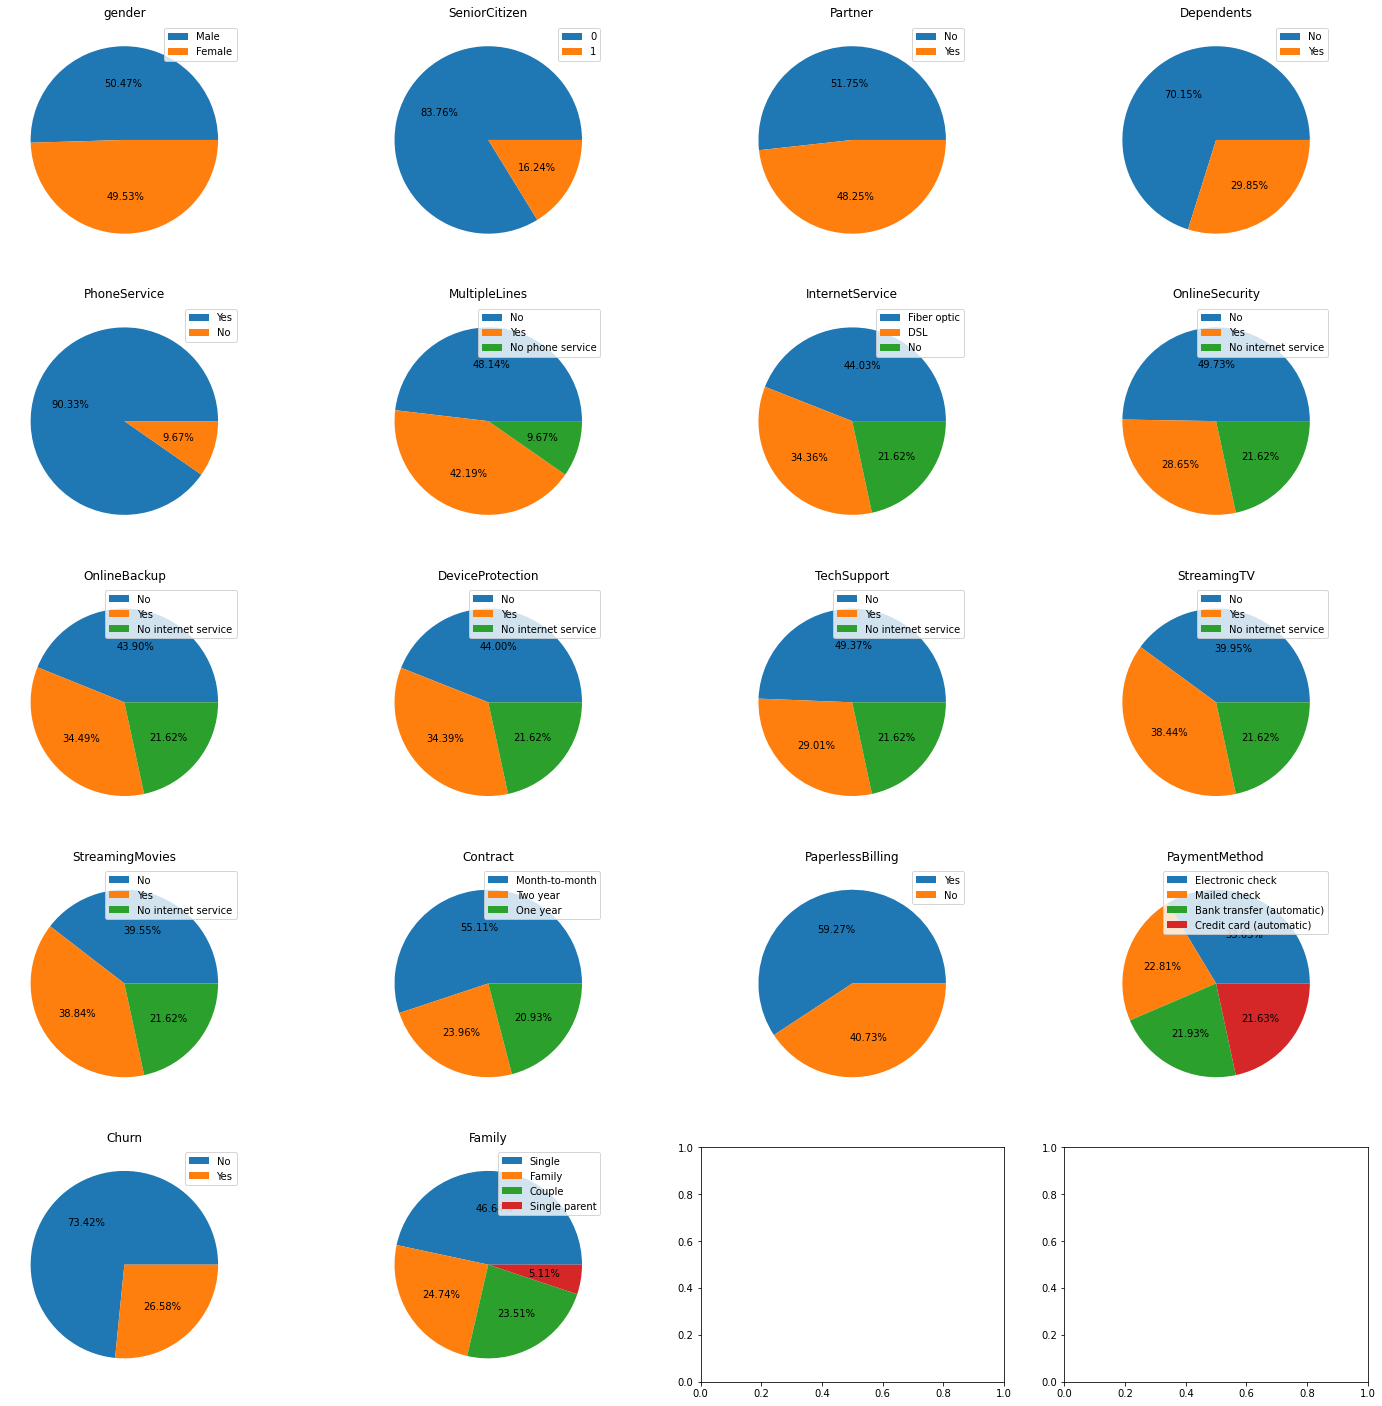

In [ ]:
import math

columns = df.columns.tolist()
dellist = ['tenure','MonthlyCharges','TotalCharges']
for i in dellist:
    columns.remove(i)
    
f, axes = plt.subplots(math.ceil(len(columns)/4),4, figsize=(25,25))
for col, ax in zip(columns, axes.ravel()):
        data = df[col].value_counts().values.tolist()
        labels = df[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')



---



In [ ]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

IndexError: ignored

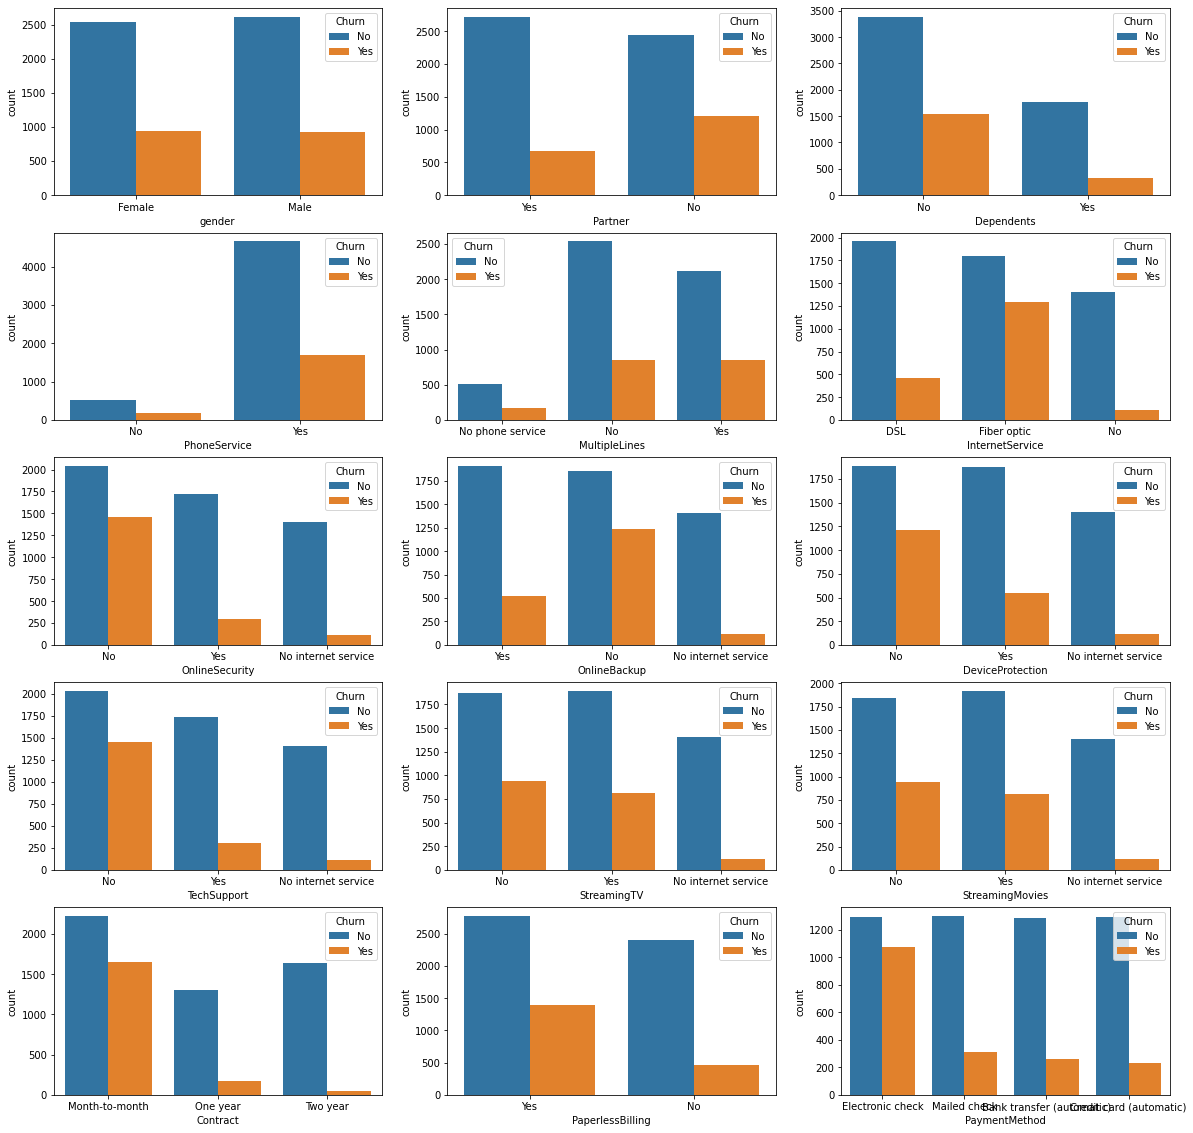

In [ ]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i])


1.   **gender**: 성별 간의 이탈률 차이는 없는 것으로 보임
2.   **SeniorCitizen**: 노인의 이탈률이 높음
3.   **Partner/Dependents/Family**:

  Partner가 있는 사람이 Partner가 없는 사람에 비해 이탈률이 낮음 -> Partner가 없을수록 이탈하는 경향이 있다. 
  
  Dependents가 있는 사람이 없는 사람에 비해 이탈률이 낮음 -> Dependents가 없을수록 이탈하는 경향이 있다.
  
  Family(Partner有 / Defendents有)의 이탈률 비중이 제일 적고, Single(Partner無 / Defendents無)의 이탈률이 가장 높다.

    *통신사 결합 상품의 영향/가족결합혜택 때문이라 예상됨


4.   **PhoneService**: 서비스를 사용하는 고객이 사용하지 않는 고객보다 많다.
5.   **MultipleLines**: MultipleLines를 이용하는 사람은 이용하지 않는 사람보다 이탈률이 높다.(통신선을 여러 곳에서 사용하다보니 이탈률이 높은 것으로 예상됨)
6.   **InternetService**:   Fiber optic를 이용하는 고객의 이탈률이 가장 높은 이탈률을 보이는 경향이 있다. internet service를 이용하는 고객일수록 이탈할 가능성이 있다.
7.   **OnlineSecurity**: OnlineSecurity를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
8.   **OnlineBackup**: OnlineBackup 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
9.   **DeviceProtection**: DeviceProtection 서비스를 이용하지 않는 고객일수록 이탈할 가능성이 높다.
10.   **TechSupport**: TechSupport 서비스를 이용하지 않는 고객일수록 이탈 가능성이 높다.


ㅤ*MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport 서비스는 이용하지 않는 고객일수록 이탈 가능성이 높다.*



11. ** StreamingTV**: StreamingTV를 사용하는 고객과 사용하지 않는 고객의 이탈률 차이가 크지 않다. V 스트리밍 서비스는 이탈률과 무관하다.
12.  **Contract**: 계약 유형 중 월별 주기로 결제하는 서비스의 이탈률이 가장 높다. 계약(결제) 주기가 짧을수록 이탈 가능성이 높고, 계약 주기가 길수록 이탈률이 낮다.
13.  **PaperlessBilling**: 전자고지서를 사용하는 고객이 그렇지 않은 고객보다 이탈 가능성이 높다.
14. **PaymentMethod**: 다른 유형에 비해 Electronic check를 이용하는 고객의 이탈률이 높다.
ㅤ



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faca8970fd0>,
      dtype=object)

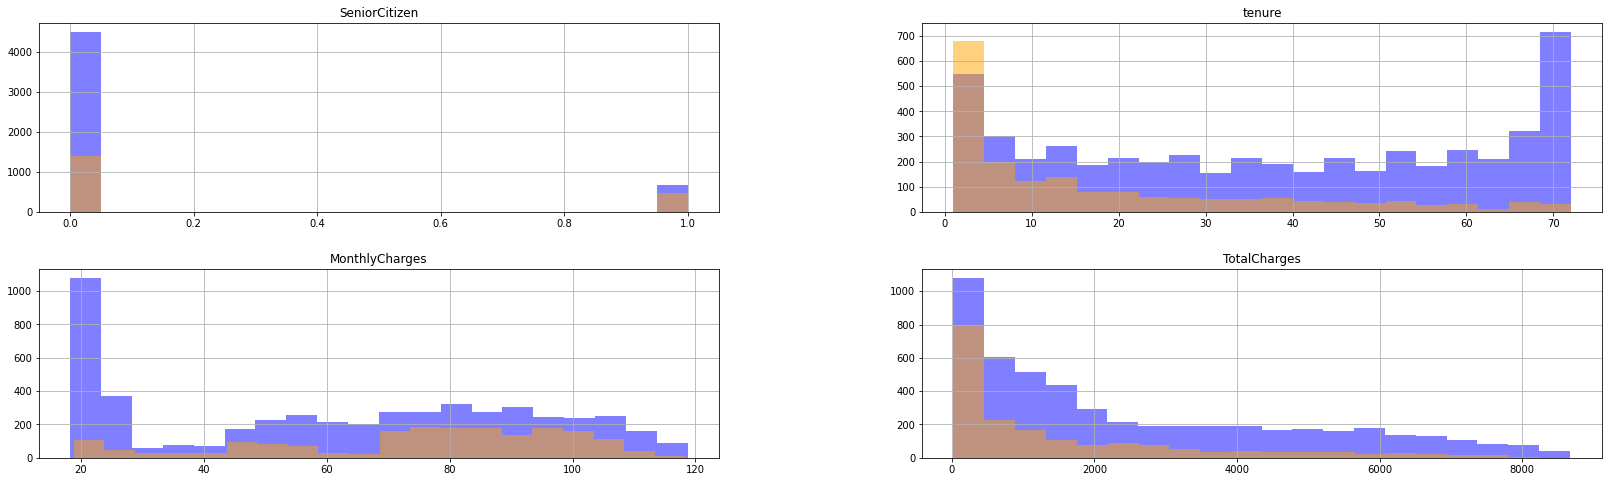

In [ ]:
# Continuous feature histograms.
fig, ax = plt.subplots(2, 2, figsize=(28, 8))
df[df.Churn == 'No'][continuous_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][continuous_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

15.  **Tenure**: 가입기간이 적을수록 이탈 확률이 높다.
16. **TotalCharges**: TotalCharges가 높을수록 이탙률이 적다. -> 토탈비용이 높다는 것은 그만큼 오래 통신사를 이용했다는 것으로, 이용 기간이 길수록 이탈률이 적다.



---


###정리

**선택지가 2개인 특성(13개)**: 이탈률이 더 높은 label을 df에 기록함.



고령자일수록, 청구서를 직접 받을수록, 온라인보안서비스를 신청하지 않았을수록 이탈률이 높음.


ㅤ

**선택지가 3개 이상인 특성(3개)**:

cat_plot을 통해 확인


*   Internet Service : fiber optic(광섬유)가 가장 이탈률이 높고 서비스를 신청하지 않은게 가장 이탈률이 낮음
*   Contract : 계약기간이 짧을수록 이탈률이 높음
*   PaymentMethod : 직접 계산할수록 이탈률이 높음


ㅤ



**연속형 특성(3개)**:


*   tenure : 남은기간이 짧을수록 이탈률 높음 
*   MontlyCharges : 이탈률과 선형적 관계없음 
*   TotalCharges : 이탈률과 선형적 관계없음


ㅤ


**상관행렬을 통한 인사이트**

total charges와 montly charges와 tenure 사이에 밀접한 관계가 있음

실제로 확인해본 결과, 식을 발견했음 total charges = montly charges * tenure



---



###가족단위 분석

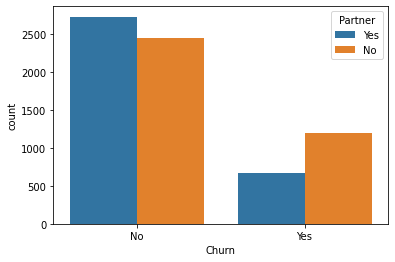

In [ ]:
sns.countplot("Churn", data=df,hue="Partner")



배우자가 없는 고객의 이탈율이 배우자가 있는 고객에 비해 약 1.67배 더 높다.

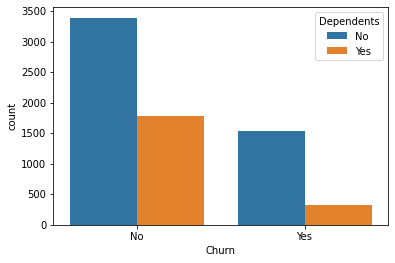

In [ ]:
sns.countplot("Churn", data=df,hue="Dependents")



자녀가 없는 고객의 이탈율이 자녀가 있는 고객에 비해 약 2배 더 높다.

In [ ]:
print(df["Family"].value_counts())

Single           3280
Family           1740
Couple           1653
Single parent     359
Name: Family, dtype: int64


In [ ]:
#이탈 고객 데이터프레임 생성
Churn_Yes = df[df['Churn'] == 'Yes']
#이탈하지 않은 고객 데이터프레임 생성
Churn_No = df[df['Churn'] == 'No']

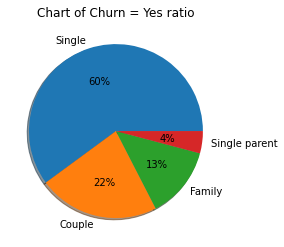

In [ ]:
#이탈한 고객의 Family Ratio 파이차트 그리기

labels_Y = Churn_Yes['Family'].value_counts().index.tolist()
ratio_Y = Churn_Yes['Family'].value_counts().values.tolist()

plt.pie(ratio_Y, labels=labels_Y, autopct='%.0f%%', shadow=True)
plt.title('Chart of Churn = Yes ratio')
plt.show()

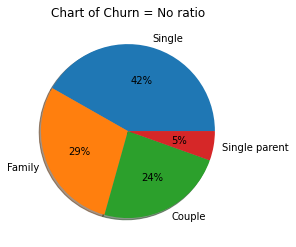

In [ ]:
#이탈하지 않은 고객의 Family Ratio 파이차트 그리기
labels_N = Churn_No['Family'].value_counts().index.tolist()
ratio_N = Churn_No['Family'].value_counts().values.tolist()

plt.pie(ratio_N, labels=labels_N, autopct='%.0f%%', shadow=True)
plt.title('Chart of Churn = No ratio')
plt.show()

Text(0.5, 1.0, 'Family feature')

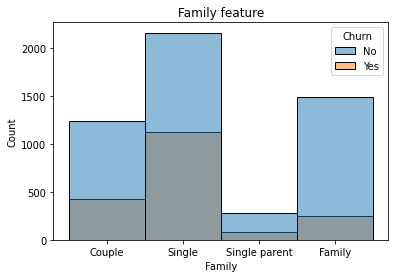

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Family",hue='Churn')
plt.title('Family feature')

Single의 이탈률이 약 30%로 가장 높고, Family의 이탈률이 약 15%로 가장 낮다.



---



ㅤ


##상관관계

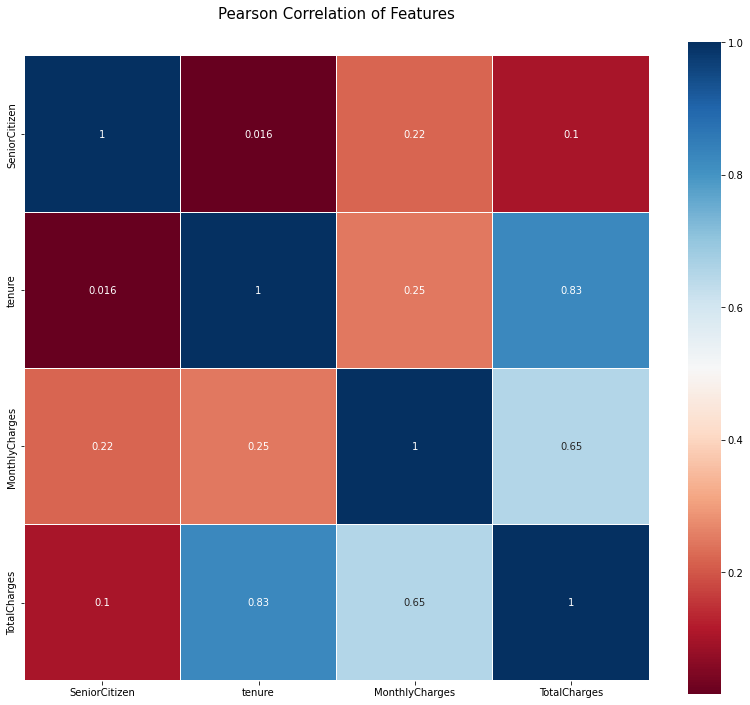

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

ㅤ

ㅤ

#Training and Test

In [ ]:
X = df[['gender',	'SeniorCitizen',	'Partner',	'Dependents', 'Family',	'tenure',	'PhoneService',	'MultipleLines',	'InternetService',	'OnlineSecurity',	'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]  
y = df[['Churn']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Family            7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
#의사결정나무 모델을 돌리기 위해 수치형 데이터를 제거함
X_new = X.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
print(X_new.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Family',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
X_new.head()

,gender,SeniorCitizen,Partner,Dependents,Family,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,Couple,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Single,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Single,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,Single,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Single,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
X_dum=pd.get_dummies(X_new)

In [ ]:
X_dum.head()
#one-hot encoding 결과 확인

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Family_Couple,Family_Family,Family_Single,Family_Single parent,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
X = X_dum



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

###의사결정나무

In [ ]:
# 데이터셋을 train과 test 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.928
시험용 데이터 정확도: 0.705


In [ ]:
#나무 깊이를 4로 제한
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.785
시험용 데이터 정확도: 0.768


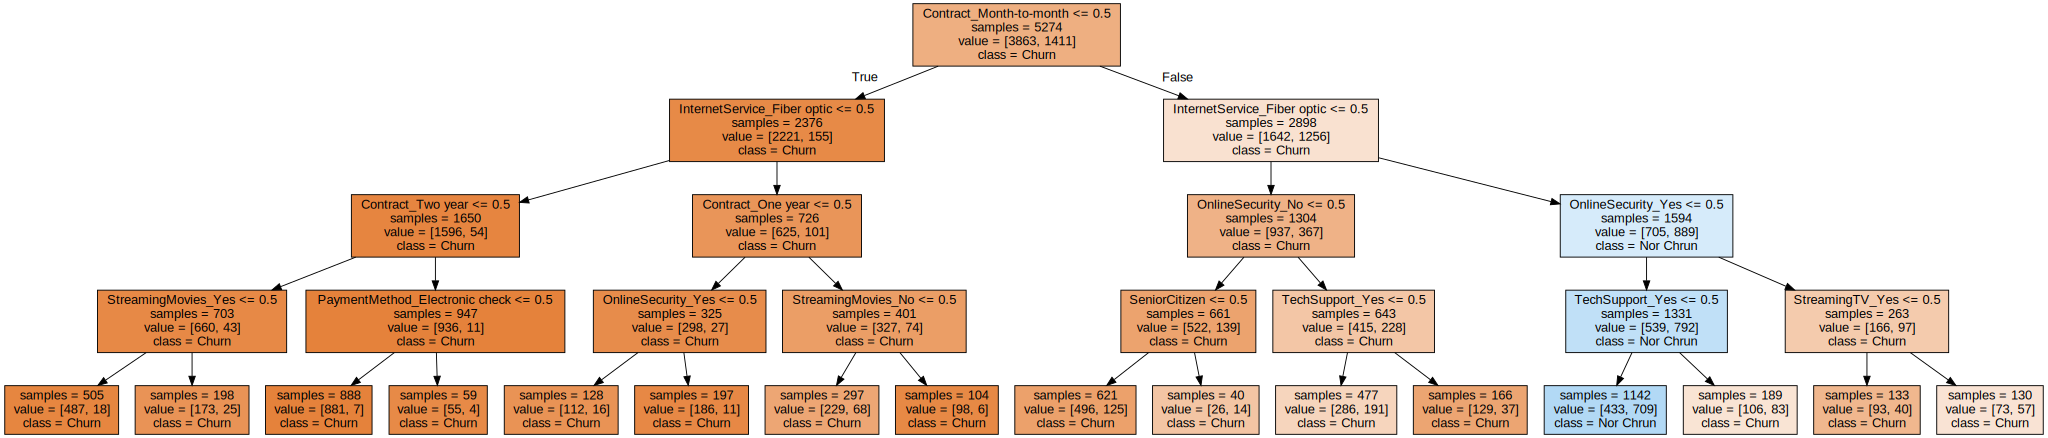

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Churn", "Nor Chrun"],
                feature_names=X_dum.columns[0:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00303764 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.22095751
 0.         0.0248065  0.         0.04243393 0.         0.
 0.         0.         0.         0.         0.         0.
 0.03375108 0.         0.         0.00455684 0.00825796 0.
 0.00426909 0.64682821 0.00675447 0.00362091 0.         0.
 0.         0.         0.00072588 0.        ]


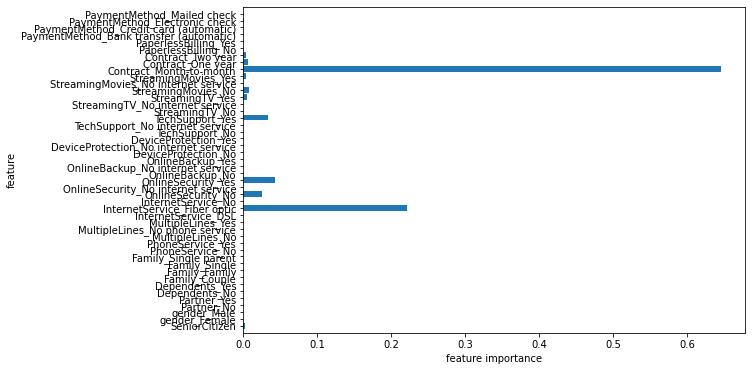

In [ ]:
import numpy as np

def plot_feature_importances_Churn(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X_dum.columns[0:]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features),X_dum.columns[0:]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_Churn(tree)

In [ ]:
res = pd.DataFrame(result) #데이터프레임 형식으로 만들기
res["name"] = X_dum.columns[0:]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       46 non-null     float64
 1   name    46 non-null     object 
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


None

,0,name
37,0.646828,Contract_Month-to-month
38,0.006754,Contract_One year
39,0.003621,Contract_Two year
5,0.000000,Dependents_No
6,0.000000,Dependents_Yes
25,0.000000,DeviceProtection_No
26,0.000000,DeviceProtection_No internet service
27,0.000000,DeviceProtection_Yes
7,0.000000,Family_Couple
8,0.000000,Family_Family



EDA에서 시각화를 통해 본 내용과 비슷한 결과가 나옴
*  [Contract_Month-to-month], [InternetService_Fiber optic], [PaymentMethod_Electronic check]  : 이탈률이 높음
*   [OnlineSecurity] : 이탈률 낮음 


---





###랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0) #100번 돌림
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.928
시험용 데이터 세트 정확도: 0.750


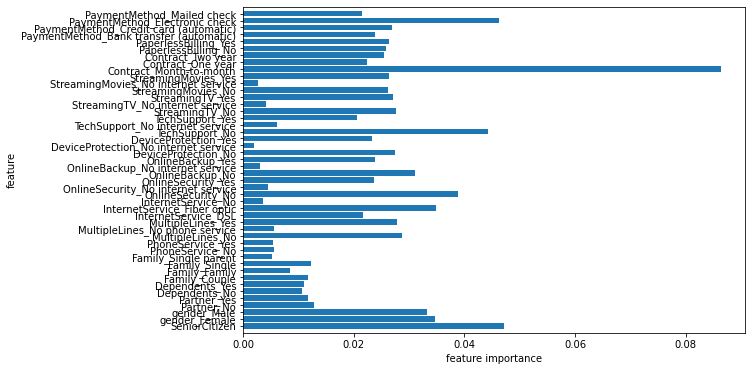

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_Churn(forest)

* 의사결정나무와 비슷한 결과
*[Contract_Month-to-month
], [InternetService_Fiber optic], [PaymentMethod_Electronic check] : 이탈률 높음
*[OnlineSecurity], [TechSupport] : 이탈률 낮음 

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.8030303  0.78409091 0.81060606 0.76515152 0.74383302 0.76850095
 0.76470588 0.78747628 0.78178368 0.80075901]
Random forest:  [0.77651515 0.79166667 0.74431818 0.73295455 0.72106262 0.76091082
 0.76470588 0.77419355 0.74573055 0.76850095]
Accuracy mean
Decision tree :0.781
Random forest :0.758


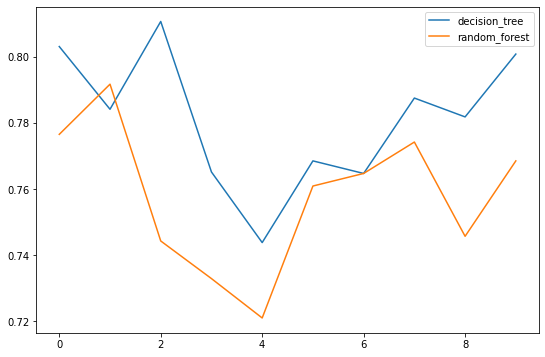

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()



---





###그래디언트부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.805
시험용 데이터 세트 정확도: 0.772


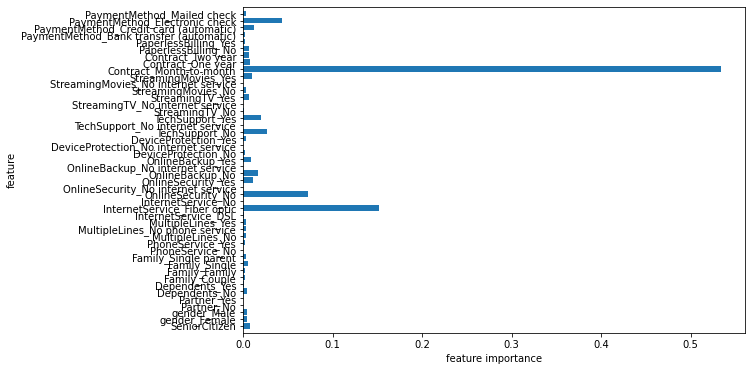

In [ ]:
plot_feature_importances_Churn(gbrt)

In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.797
시험용 데이터 세트 정확도: 0.768




---



## 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [ ]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.7}

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.7, random_state=42)

In [ ]:
clf.best_score_

0.7847950933928074

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.023388,0.000786,0.007021,0.000420,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.794313,0.795261,0.758294,0.781991,0.794118,0.784795,0.014122,1
12,0.024682,0.000737,0.007042,0.000298,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.795261,0.781043,0.758294,0.784834,0.792220,0.782330,0.013044,2
10,0.020044,0.001141,0.006416,0.000122,5,0.3,"{'max_depth': 5, 'max_features': 0.3}",0.793365,0.781991,0.756398,0.786730,0.786528,0.781002,0.012826,3
11,0.024968,0.005454,0.008328,0.003324,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.795261,0.774408,0.760190,0.779147,0.792220,0.780245,0.012699,4
20,0.021937,0.001588,0.006468,0.000319,7,0.3,"{'max_depth': 7, 'max_features': 0.3}",0.798104,0.772512,0.765877,0.766825,0.796964,0.780056,0.014454,5


In [ ]:
clf.predict(X_test)

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
clf.score(X_test, y_test)

0.7679180887372014



---



## 랜덤서치

In [ ]:
max_depth = np.random.randint(4, 20, 10)
max_depth
 
max_features = np.random.uniform(0.8, 1.0, 100)
 
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))
           }
param_distributions

{'max_depth': array([15,  7,  5, 19, 13,  9, 15, 19,  5,  6]),
 'max_features': array([0.81630679, 0.84785083, 0.9684892 , 0.9549315 , 0.93755421,
        0.90057949, 0.90532898, 0.95175182, 0.86106869, 0.97852757,
        0.93864035, 0.82079432, 0.84648685, 0.97958319, 0.87338528,
        0.88328293, 0.98285249, 0.88359365, 0.8136479 , 0.97958159,
        0.83902571, 0.85787545, 0.92537896, 0.99517939, 0.91450578,
        0.83624132, 0.91260063, 0.97782542, 0.83076199, 0.80232484,
        0.88295154, 0.8524191 , 0.93330464, 0.86530797, 0.91964617,
        0.93626144, 0.82016526, 0.88923922, 0.92267149, 0.87480536,
        0.81219982, 0.88043997, 0.93447782, 0.97943442, 0.92361797,
        0.83087056, 0.89334643, 0.80438359, 0.85767905, 0.82075867,
        0.80689653, 0.81280932, 0.87957153, 0.85595046, 0.82663829,
        0.93666302, 0.93653015, 0.91150479, 0.88232199, 0.99796571,
        0.99167642, 0.91597465, 0.85985122, 0.96516578, 0.83856111,
        0.95917622, 0.91776742, 0.906

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=1000,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([15,  7,  5, 19, 13,  9, 15, 19,  5,  6]),
                                        'max_features': array([0.81630679, 0.84785083, 0.9684892 , 0.9549315 , 0.93755421,
       0.90057949, 0.90532898, 0.95175182, 0.86106869, 0.97852757,
       0.93864035, 0.82079432, 0.84648685, 0.97958319, 0.87338528,
       0....
       0.84421269, 0.93214217, 0.82666703, 0.89387027, 0.81622142,
       0.92968544, 0.87670069, 0.86813894, 0.80087341, 0.85271809,
       0.88944768, 0.84744642, 0.91675527, 0.93412075, 0.9838121 ,
       0.98892191, 0.80418457, 0.96167795, 0.93437475, 0.99145264,
       0.95285591, 0.81713355, 0.8735379 , 0.80720528, 0.87707978,
       0.82472238, 0.94994708, 0.80410926, 0.92946672, 0.95239649]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_

In [ ]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8041092577494358, 'max_depth': 5}

In [ ]:
clf.score(X_test, y_test)

0.767349260523322

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
491,0.026346,0.003519,0.006506,0.000098,5,0.804185,5,"{'min_samples_split': 5, 'max_features': 0.804...",0.797156,0.781043,0.758294,0.781991,0.79222,0.782141,0.013394,1
531,0.026149,0.002122,0.006529,0.000231,6,0.802325,5,"{'min_samples_split': 6, 'max_features': 0.802...",0.797156,0.781043,0.758294,0.781991,0.79222,0.782141,0.013394,1
697,0.029183,0.005780,0.007201,0.001782,4,0.800873,5,"{'min_samples_split': 4, 'max_features': 0.800...",0.797156,0.781043,0.758294,0.781991,0.79222,0.782141,0.013394,1
332,0.027509,0.000835,0.007074,0.000142,5,0.802325,5,"{'min_samples_split': 5, 'max_features': 0.802...",0.797156,0.781043,0.758294,0.781991,0.79222,0.782141,0.013394,1
555,0.024798,0.000471,0.006463,0.000146,3,0.800873,5,"{'min_samples_split': 3, 'max_features': 0.800...",0.797156,0.781043,0.758294,0.781991,0.79222,0.782141,0.013394,1




---

## 로지스틱 회귀
* 여기서부터는 구글링으로 긁어온 거라 틀린 부분이 있을 수도 있을 것 같아요😭

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.770193401592719




---

## SVM


주어진 데이터가 어느 카테고리에 속할지 판단하는 이진 선형 분류 모델

In [ ]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7639362912400455

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[1083  217]
 [ 198  260]]




---

## XG Boost


In [ ]:
# XG Boost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7747440273037542



---

##💫결과 (정확도 비교)

*   의사결정나무: 0.768
*   랜덤 포레스트: 0.750
*   그래디언트부스팅: 0.788
*   그리드 서치: 0.767
*   랜덤서치: 0.767
*   로지스틱 회귀: 0.770
*   SVM: 0.763
*   XG Boost: 0.774


    정확도: 그래디언트부스팅(0.788) > XG Boost(0.774) > 로지스틱 회귀(0.770) > 의사결정나무(0.768) > 그리드서치(0.767) >= 랜덤서치(0.767) > SVM(0.763) > 랜덤포레스트(0.759)